<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [39]:
df = pd.read_csv("C:/Users/Дмитрий/Desktop/ML_VVSU/anime.csv")

df.dropna(inplace=True) #удаление пустых строк
df = df.loc[df['episodes'] != 'Unknown']
df['rating'] = df['rating'].round(1) #округление
df['rating'] = df['rating'].astype(int) #перевод из float в int

df


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4,211
12290,5543,Under World,Hentai,OVA,1,4,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,5,175


In [40]:
df.iloc[[72]]

,anime_id,name,genre,type,episodes,rating,members
72,16894,Kuroko no Basket 2nd Season,"Comedy, School, Shounen, Sports",TV,25,8,243325


In [41]:
a = {"episodes":{'Unknown': 0}}
df = df.replace(a)            

In [42]:
df.dtypes

anime_id     int64
name        object
genre       object
type        object
episodes    object
rating       int32
members      int64
dtype: object

In [43]:
describe = df["rating"].describe()
describe

count    11830.000000
mean         6.042181
std          1.057400
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: rating, dtype: float64

In [44]:
mean = df.groupby(['type'])['rating'].mean()
mean

type
Movie      5.892383
Music      5.154004
ONA        5.217822
OVA        5.934073
Special    6.079880
TV         6.478980
Name: rating, dtype: float64

In [45]:
median = df.groupby(['type'])['rating'].median()
median

type
Movie      6.0
Music      5.0
ONA        5.0
OVA        6.0
Special    6.0
TV         7.0
Name: rating, dtype: float64

In [46]:
mode = df.groupby('type')['rating'].agg(pd.Series.mode)
mode

type
Movie           6
Music           5
ONA        [5, 6]
OVA             6
Special         6
TV              7
Name: rating, dtype: object

In [47]:
min = df.groupby(['type'])['rating'].min()
min

type
Movie      1
Music      3
ONA        2
OVA        2
Special    1
TV         3
Name: rating, dtype: int32

In [48]:
max = df.groupby(['type'])['rating'].max()
max

type
Movie      10
Music       8
ONA         8
OVA         9
Special     8
TV          9
Name: rating, dtype: int32

In [49]:
std = df.groupby(['type'])['rating'].std()
std

type
Movie      1.233280
Music      1.011711
ONA        1.187572
OVA        0.902981
Special    0.928442
TV         0.885105
Name: rating, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [50]:
q1 = df.groupby(['type'])['rating'].quantile(0.25) # (25% квантиль) ваш код здесь
q1

type
Movie      5.0
Music      5.0
ONA        4.0
OVA        5.0
Special    6.0
TV         6.0
Name: rating, dtype: float64

In [51]:
q2 = df.groupby(['type'])['rating'].quantile(0.5) # (50% квантиль) ваш код здесь
q2

type
Movie      6.0
Music      5.0
ONA        5.0
OVA        6.0
Special    6.0
TV         7.0
Name: rating, dtype: float64

In [52]:
q3 = df.groupby(['type'])['rating'].quantile(0.75) # (75% квантиль) ваш код здесь
q3

type
Movie      7.0
Music      6.0
ONA        6.0
OVA        6.0
Special    7.0
TV         7.0
Name: rating, dtype: float64

In [53]:
iqr = q3 - q1 # (интерквартильный размах) ваш код здесь
iqr

type
Movie      2.0
Music      1.0
ONA        2.0
OVA        1.0
Special    1.0
TV         1.0
Name: rating, dtype: float64

Какие выводы можно сделать исходя из полученных статистических данных?

Исходя из полученных данных (min,max,mode,median,mean,std) можно сказать что в данных есть большие отличия в зависимости от типа аниме. Минимальный рейтинг прослеживается у Special, максимальный у Movie.
Между медианами и средними значениями практически нет отличий
Мода среди рейтинга практически чреди всех типов аниме ровна 6

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

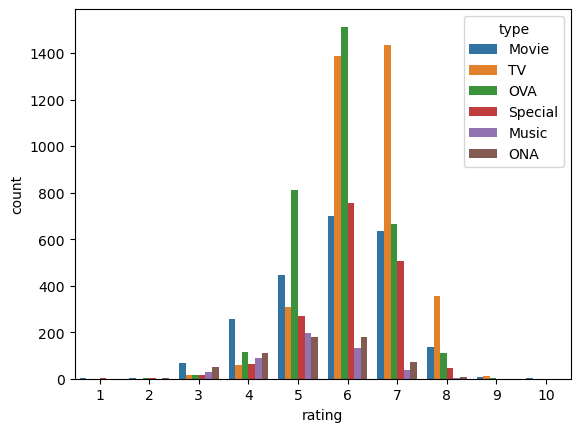

In [54]:
sns.countplot(x='rating', hue='type', data=df);

Из гистограммы видно, что наиболее распространенные оценки получаются для OVA, при этом средний рейтинг составляет 6,
TV тоже часто оценивается, но средний рейтинг выше и приближается к 7.m

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

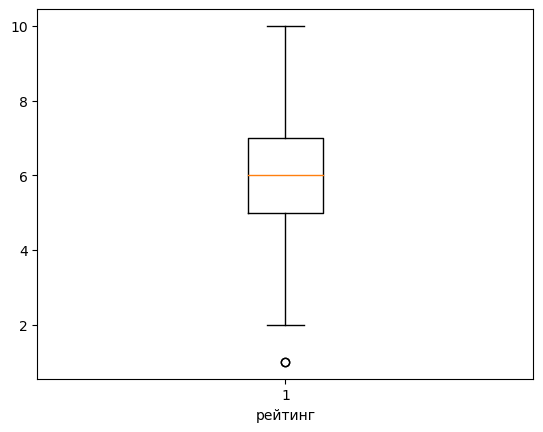

In [66]:
plt.boxplot(df['rating'])
plt.xlabel('рейтинг')
plt.show()

Исходя из данных гистограммы, видно, что в датасете есть аниме с рейтингом 1,
и данное значение рассматривается как выброс.

<Axes: xlabel='type', ylabel='rating'>

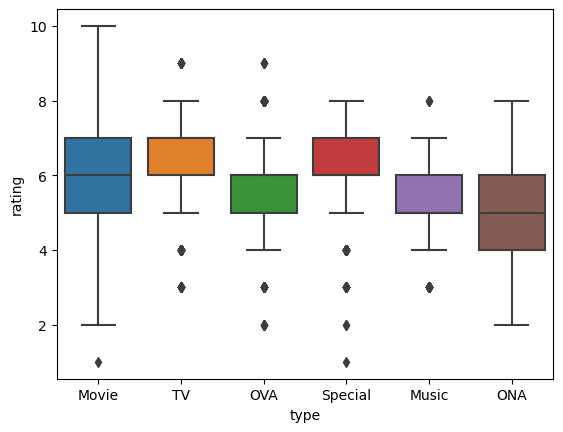

In [56]:
sns.boxplot(y="rating", x="type", data=df)

Из этойдиаграммы видно, что во всех типах, за исключением ONA, наблюдаются выбросы. Special содержит больше всего выбрасов

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

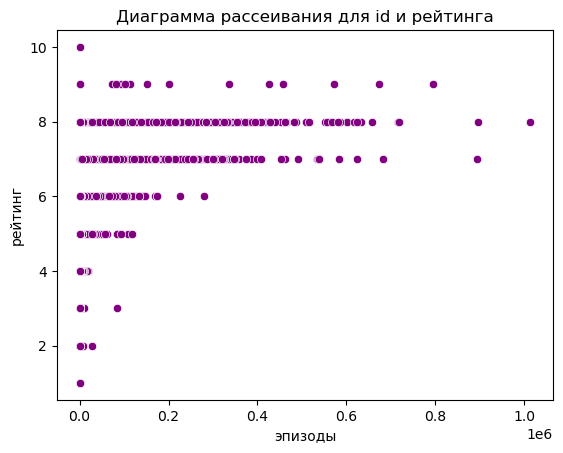

In [57]:
sns.scatterplot(x=df['members'], y=df['rating'], color='purple')
plt.title('Диаграмма рассеивания для id и рейтинга')
plt.xlabel('эпизоды')
plt.ylabel('рейтинг')
plt.show()    

Заметно, что аниме с меньшим числом эпизодов имеют более высокий рейтинг по сравнению с теми, у которых большее количество
эпизодов, и это соответствует уменьшению рейтинга по мере увеличения числа эпизодов.

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

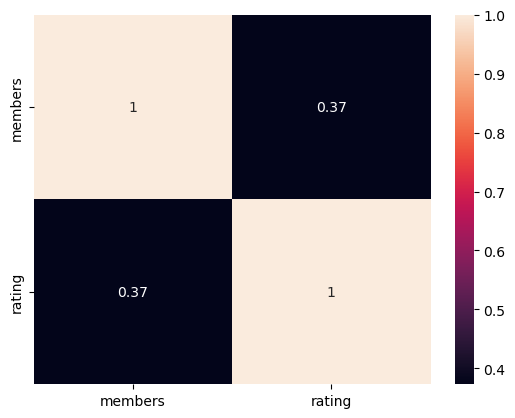

In [58]:
grouped_data = df[["members","rating"]]

corr_matrix = grouped_data.corr()

sns.heatmap(corr_matrix, annot=True)

Из матрицы корреляции видно, что существует слабая, поскольку она чуть выше нуля, взаимосвязь между rating и members
Поскольку она чуть выше нуля

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [59]:
import math
from statistics import median, mean
from sklearn.cluster import DBSCAN

class Outline:
  def __init__(self, df):
    self.df = df
  def detec_otline_by_showene(self, column_name):
        res = []
        n = self.df[column_name].count()
        mean = self.df[column_name].mean()
        std = self.df[column_name].std()
        for index, value in self.df.iterrows():
            if math.erfc((abs(value[column_name] - mean)) / std) < 1 / (2 * n):
                res.append((index, value[column_name]))
            else:
                n -= 1
        return res

  def detect_outline_by_quantile(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        minimum = Q1 - 1.5 * (Q3 - Q1)
        maximum = Q3 + 1.5 * (Q3 - Q1)
        outliers = self.df[(self.df[column_name] < minimum) | (self.df[column_name] > maximum)]
        return outliers.items()

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result
  def detect_outline_by_mean_std(self,column_name,coef):
        mean = self.df[column_name].mean()
        median = self.df[column_name].median()
        std = self.df[column_name].std()
        n = self.df[column_name].count()
        lower_bound = mean - coef  * std
        upper_bound = mean + coef * std
        outliners = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name]<=upper_bound)]
        return outliners.items()
  def detect_outliner_by_DBSCAN(self, col1, col2, eps, min_samples=2):
        data = self.df[[col1, col2]].to_numpy()

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        labels = db.labels_

        # Вычисление количества элементов в каждом кластере
        unique, counts = np.unique(labels, return_counts=True)
        clusters_counts = dict(zip(unique, counts))
        print(labels)
        # Поиск кластеров с количеством элементов <= 2
        small_clusters = [cluster for cluster, count in clusters_counts.items() if count <= 2]
        print(small_clusters)

        # Возвращение индексов строк для этих кластеров
        outlier_indices = self.df.index[np.isin(labels, small_clusters)].tolist()

        return outlier_indices

In [60]:
#1 На основе среднего и отклонения
data = pd.DataFrame(
    data = {
        "col1": [100, 101, 102, 1004, 103, 104],
        "col2": [100, 101, 102, 103, 104, 105]
    }
)

so = Outline(data)
outliners = so.detect_outline_by_mean_std("col1",1.5)
print(f"idx\tnum")
for idx,item in outliners:
    print(idx,item)

idx	num
col1 0    100
1    101
2    102
4    103
5    104
Name: col1, dtype: int64
col2 0    100
1    101
2    102
4    104
5    105
Name: col2, dtype: int64


In [61]:
#2. Критерий Шовене
data = pd.DataFrame(
    data = {
        "col1": [100, 102, 103, 104, 105, 1004],
        "col2": [100, 102, 103, 104, 105, 106]
    }
)

so = Outline(data)
outlines = so.detec_otline_by_showene("col1")
print(f"idx\tnum")
for tup in outlines:
    print(f"{tup[0]}\t{tup[1]}")

idx	num
5	1004


In [62]:
#3. С помощью квартилей
data = pd.DataFrame(
    data = {
        "col1": [100, 102, 103, 104, 105, 1004],
        "col2": [100, 102, 103, 102, 101, 104]
    }
)

so = Outline(data)
outliners = so.detect_outline_by_quantile("col1")
print(f"idx\tnum")
for idx,item in outliners:
    print(idx,item)

idx	num
col1 5    1004
Name: col1, dtype: int64
col2 5    104
Name: col2, dtype: int64


In [63]:
#detect_outliner_by_DBSCAN
data = pd.DataFrame(
    data = {
        "col1": [100, 102, 103, 104, 105, 100000],
        "col2": [100, 102, 103, 104, 105, 106]
    }
)

so = Outline(data)
so.detect_outliner_by_DBSCAN("col1", "col2", 10, 2)

[ 0  0  0  0  0 -1]
[-1]


[5]

### Пример реализации одного метода